In [21]:
from operators import *
##Imports
import matplotlib.pyplot as plt
from numpy.linalg import norm
import numpy as np
import pandas as pd
from tqdm import tqdm
##Variables
nu=1e-6
mu=1e-3
rho=1e+3
dt=0.00001
#dt=0.001
gradP=-0.375
u_avg=0.0125
ny=70
nx =int(ny*2) 
L=0.04
H=0.02
h=L/nx
u_max=0.01875

In [22]:
CFL=u_avg*(dt/(L/nx))

In [28]:
gradP

-0.375

In [26]:
un=u_max*np.ones(((nx+2)*(ny+2) ))
un_actual=un.reshape((nx+2,ny+2))
u_star = np.zeros((nx+2, ny+2), dtype = float)
u_new = np.zeros((nx+2, ny+2),dtype = float)
def u_analytic(y,gradP,h):
    return -gradP*((h**2)/(2*mu))*(1-((y**2)/(h**2)))
x2= np.linspace(-H/2,H/2,ny+2)
ref_sol=u_analytic(x2,gradP,h)
ylistanal=np.linspace(0,H, ny+2)


def BC_period(u):

    u[0,:]=u[-2,:]
    u[-1,:] = u[1,:]
    
    return u

def BC_drich(u):
    u[:,0]= -u[:,1]
    u[:,-1] = - u[:,-2]
    return u



def diff_x(u):
    #qo = np.nan*np.ones((len(un)))
    qo = np.zeros_like(u)
    for i in range(1,nx+1):
        for j in range(1,ny+1):
            qo[i,j] = (1/(h**2))*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-4*u[i,j])
    return qo

def corrector_step(u):
    qo = np.zeros_like(u)
    for j in range(1, ny+1):
        for i in range(1, nx+1):
            qo[i,j] = u[i,j] - (1/rho)*(dt)*gradP
    return qo

norm_list=[]
for step in range(1000):
    u_s = un_actual+ dt * (mu*diff_x(un_actual))
    u_s=BC_drich(u_s)
    u_s=BC_period(u_s)
    u_new=corrector_step(u_s)
    u_new=BC_drich(u_new)
    u_new=BC_period(u_new)
    un_actual = u_new
    cr_norm=norm(ref_sol-un_actual[30,:])
    if step>100:
        if cr_norm>np.max(norm_list):
            break
    norm_list.append(cr_norm)

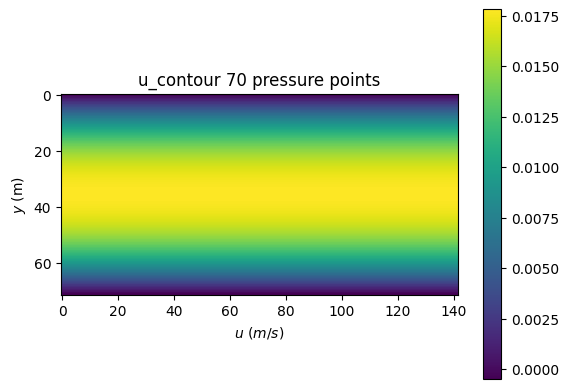

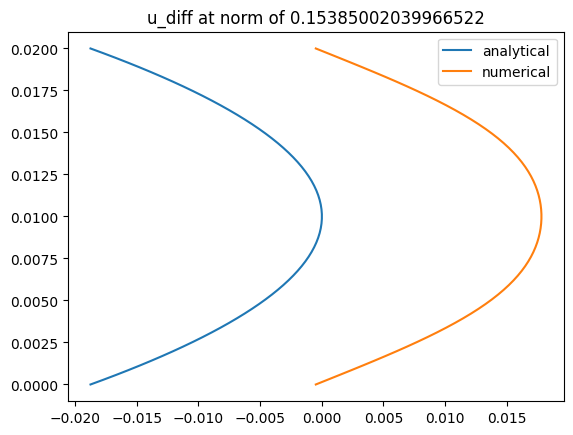

In [27]:
plt.imshow(np.flipud(un_actual.T))
plt.colorbar()
plt.title('u_contour 70 pressure points')
plt.xlabel('$u$ ($m/s$)')
plt.ylabel('$y$ (m)')
plt.show()

plt.plot(ref_sol,ylistanal,label='analytical')
plt.plot(un_actual[30,:],ylistanal,label='numerical')
plt.title(f"u_diff at norm of {cr_norm}")
plt.legend()
plt.show()

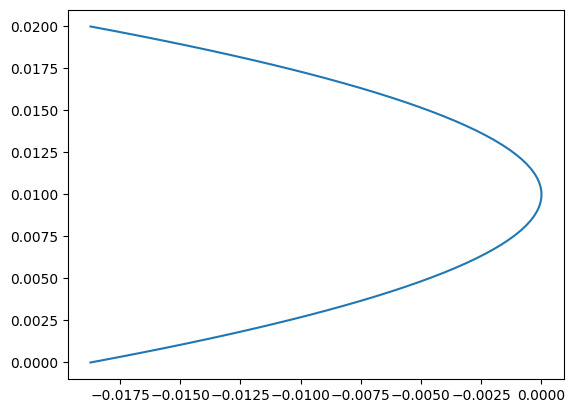

In [31]:
plt.plot(ref_sol,ylistanal,label='analytical')

In [30]:
ref_sol

array([-1.87346939e-02, -1.76932338e-02, -1.66815298e-02, -1.56995818e-02,
       -1.47473898e-02, -1.38249537e-02, -1.29322737e-02, -1.20693497e-02,
       -1.12361817e-02, -1.04327697e-02, -9.65911364e-03, -8.91521362e-03,
       -8.20106960e-03, -7.51668158e-03, -6.86204956e-03, -6.23717354e-03,
       -5.64205353e-03, -5.07668951e-03, -4.54108150e-03, -4.03522949e-03,
       -3.55913347e-03, -3.11279346e-03, -2.69620945e-03, -2.30938144e-03,
       -1.95230943e-03, -1.62499342e-03, -1.32743341e-03, -1.05962941e-03,
       -8.21581400e-04, -6.13289394e-04, -4.34753390e-04, -2.85973386e-04,
       -1.66949382e-04, -7.76813800e-05, -1.81693784e-05,  1.15866223e-05,
        1.15866223e-05, -1.81693784e-05, -7.76813800e-05, -1.66949382e-04,
       -2.85973386e-04, -4.34753390e-04, -6.13289394e-04, -8.21581400e-04,
       -1.05962941e-03, -1.32743341e-03, -1.62499342e-03, -1.95230943e-03,
       -2.30938144e-03, -2.69620945e-03, -3.11279346e-03, -3.55913347e-03,
       -4.03522949e-03, -

In [55]:
def u_analytic(y,gradP,h):
    return -gradP*(1/(2*mu))*((h**2)-((y**2)))
x2= np.linspace(-H/2,H/2,ny+2)
ref_sol=u_analytic(x2,gradP,h)
#ylistanal=np.linspace(0,H, ny+2)

In [56]:
ref_sol.shape

(72,)

In [57]:
x2.shape

(72,)

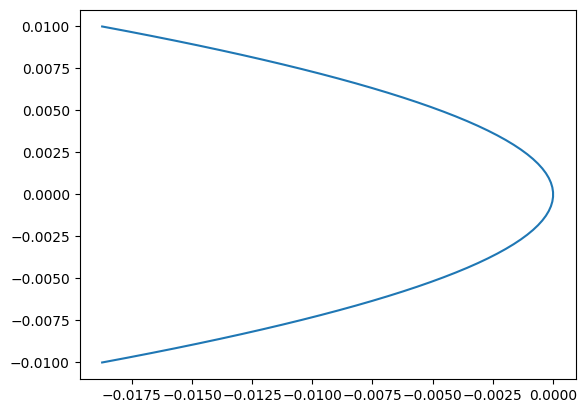

In [58]:
plt.plot(ref_sol,x2)